In [ ]:
!pip install yfinance

#**Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#**Data Collection - NIFTY50**

In [ ]:
# Define Nifty50 Stocks
nifty50_stocks = ['ADANIENT.NS', 'ADANIPORTS.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS',
                   'BAJAJFINSV.NS', 'BEL.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DRREDDY.NS',
                   'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS',
                   'HINDUNILVR.NS', 'ICICIBANK.NS', 'ITC.NS', 'INDUSINDBK.NS', 'INFY.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS',
                   'M&M.NS', 'MARUTI.NS', 'NTPC.NS', 'NESTLEIND.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBILIFE.NS',
                   'SHRIRAMFIN.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS',
                   'TECHM.NS', 'TITAN.NS', 'TRENT.NS', 'ULTRACEMCO.NS', 'WIPRO.NS']

# Fetch 3 years historical data for selected stocks
def get_data(stock_list, start_date = '2021-10-11', end_date = '2024-10-11'):
    data = yf.download(stock_list, start = start_date, end = end_date)['Adj Close']
    return data

# Get data for the selected stocks
data = get_data(nifty50_stocks)

[*********************100%***********************]  50 of 50 completed


In [ ]:
# The latest Risk free rate in India
latest_risk_free_rate = 6.788 / 100
latest_risk_free_rate

0.06788

#**Data Preperation**

In [ ]:
# Handle missing data (if any)
daily_returns = data.pct_change().dropna()
daily_returns.head()

Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BEL.NS,BHARTIARTL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,TRENT.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-12 00:00:00+00:00,0.009547,-0.000746,-0.005906,0.005203,0.012704,0.032878,0.028717,0.004944,0.007910,-0.006514,...,-0.003423,-0.000123,0.012267,0.012108,-0.008886,-0.018390,0.055114,0.027603,-0.010927,0.009651
2021-10-13 00:00:00+00:00,0.009811,0.029990,0.006021,0.000075,-0.003199,-0.002790,-0.001888,0.009362,-0.007610,0.005172,...,0.015488,0.039209,0.204467,0.018960,0.000643,0.020154,0.017893,0.035815,0.013827,0.020482
2021-10-14 00:00:00+00:00,0.048831,0.070883,-0.011216,-0.007733,0.009376,-0.000441,0.016530,-0.008374,0.009106,-0.005943,...,-0.001483,0.001710,-0.018347,0.015322,-0.010074,0.020433,0.010583,-0.016820,0.006136,0.053003
2021-10-18 00:00:00+00:00,-0.018738,-0.002768,0.000462,-0.017072,0.014027,-0.012595,0.010225,0.000337,0.031346,-0.007582,...,-0.006419,-0.006650,0.024116,0.026181,0.009885,0.034142,0.009653,-0.000130,0.000514,0.002118
2021-10-19 00:00:00+00:00,-0.028505,-0.022577,-0.006778,-0.017816,-0.014324,-0.001124,0.021341,-0.016051,-0.047433,0.000735,...,-0.010229,-0.000770,-0.054356,-0.031289,-0.003564,0.040178,-0.040135,-0.032617,-0.030976,0.002536


In [ ]:
# Calculate the Mean Returns and Covariance Matrix
mean_returns_N50 = daily_returns.mean()
covariance_matrix_N50 = daily_returns.cov()

In [ ]:
print("The mean daily returns:\n")
mean_returns_N50

The mean daily returns:



,0
Ticker,
ADANIENT.NS,0.001571
ADANIPORTS.NS,0.001239
APOLLOHOSP.NS,0.000793
ASIANPAINT.NS,0.000026
AXISBANK.NS,0.000681
BAJAJ-AUTO.NS,0.001726
BAJAJFINSV.NS,0.000227
BAJFINANCE.NS,0.000087
BEL.NS,0.002205


In [ ]:
print("The Covariance Matrix for the daily returns\n")
covariance_matrix_N50

The Covariance Matrix for the daily returns



Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BEL.NS,BHARTIARTL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,TRENT.NS,ULTRACEMCO.NS,WIPRO.NS
Ticker,,,,,,,,,,,,,,,,,,,,,
ADANIENT.NS,0.001145,0.000667,0.000110,0.000107,0.000129,0.000090,0.000187,0.000183,0.000262,0.000109,...,0.000074,0.000114,0.000208,0.000124,0.000082,0.000114,0.000141,0.000161,0.000144,0.000116
ADANIPORTS.NS,0.000667,0.000648,0.000094,0.000094,0.000140,0.000083,0.000171,0.000175,0.000258,0.000108,...,0.000075,0.000105,0.000185,0.000149,0.000079,0.000111,0.000141,0.000161,0.000140,0.000121
APOLLOHOSP.NS,0.000110,0.000094,0.000309,0.000063,0.000054,0.000054,0.000082,0.000093,0.000086,0.000047,...,0.000054,0.000064,0.000108,0.000057,0.000045,0.000088,0.000077,0.000078,0.000064,0.000075
ASIANPAINT.NS,0.000107,0.000094,0.000063,0.000191,0.000035,0.000041,0.000080,0.000086,0.000040,0.000033,...,0.000039,0.000071,0.000058,0.000036,0.000052,0.000055,0.000077,0.000084,0.000073,0.000060
AXISBANK.NS,0.000129,0.000140,0.000054,0.000035,0.000247,0.000053,0.000112,0.000112,0.000096,0.000059,...,0.000023,0.000050,0.000105,0.000070,0.000041,0.000057,0.000069,0.000076,0.000079,0.000063
BAJAJ-AUTO.NS,0.000090,0.000083,0.000054,0.000041,0.000053,0.000215,0.000064,0.000061,0.000067,0.000058,...,0.000040,0.000058,0.000109,0.000052,0.000028,0.000035,0.000064,0.000076,0.000051,0.000039
BAJAJFINSV.NS,0.000187,0.000171,0.000082,0.000080,0.000112,0.000064,0.000296,0.000246,0.000110,0.000060,...,0.000051,0.000087,0.000138,0.000089,0.000070,0.000096,0.000115,0.000119,0.000102,0.000095
BAJFINANCE.NS,0.000183,0.000175,0.000093,0.000086,0.000112,0.000061,0.000246,0.000317,0.000108,0.000068,...,0.000053,0.000090,0.000134,0.000072,0.000071,0.000092,0.000112,0.000129,0.000106,0.000095
BEL.NS,0.000262,0.000258,0.000086,0.000040,0.000096,0.000067,0.000110,0.000108,0.000440,0.000078,...,0.000044,0.000086,0.000167,0.000133,0.000043,0.000085,0.000094,0.000131,0.000099,0.000085


# **Markowitz Model**

In [ ]:
# Define the function to calculate portfolio performance
def portfolio_performance(weights, returns = daily_returns, risk_free_rate = latest_risk_free_rate):
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev
    return portfolio_return, portfolio_stddev, sharpe_ratio

# Constraints and Bounds
def check_sum_of_weights(weights):
    return np.sum(weights) - 1

constraints = ({'type': 'eq', 'fun': check_sum_of_weights})
bounds = tuple((0, 1) for _ in range(len(nifty50_stocks)))

# Function to minimize inverse sharpe ratio
def minimize_inverse_sharpe_ratio(weights):
    return 1 / portfolio_performance(weights)[2]

# Initial Guess for weights
initial_weights = len(nifty50_stocks) * [1. / len(nifty50_stocks)]

# Optimize the portfolio to maximize the Sharpe Ratio
optimized_result = minimize(minimize_inverse_sharpe_ratio, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

# The resulting optimized weights after the optimization process
optimized_weights = optimized_result.x
optimized_weights

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.62336009e-17,
       0.00000000e+00, 2.04826705e-01, 0.00000000e+00, 1.34138131e-16,
       6.42417318e-02, 5.27397347e-02, 3.15502565e-18, 0.00000000e+00,
       4.47312386e-02, 3.00889702e-03, 0.00000000e+00, 4.60082950e-17,
       5.76239996e-17, 3.52882912e-17, 1.64705471e-16, 7.51790915e-18,
       0.00000000e+00, 0.00000000e+00, 1.31265133e-16, 0.00000000e+00,
       0.00000000e+00, 9.17662687e-17, 7.90148367e-02, 8.33099039e-17,
       0.00000000e+00, 0.00000000e+00, 7.45693248e-02, 0.00000000e+00,
       0.00000000e+00, 7.39798580e-02, 0.00000000e+00, 4.53372745e-02,
       5.87782291e-17, 4.11760859e-17, 0.00000000e+00, 0.00000000e+00,
       9.77535858e-02, 0.00000000e+00, 6.72280828e-17, 2.26916146e-02,
       0.00000000e+00, 9.17329668e-17, 0.00000000e+00, 2.37105199e-01,
       1.19779779e-18, 8.22161731e-17])

In [ ]:
optimized_return, optimized_stddev, optimized_sharpe = portfolio_performance(optimized_weights)

print("Optimized Return:", optimized_return)
print("Optimized Standard Deviation:", optimized_stddev)
print("Optimized Sharpe Ratio:", optimized_sharpe)

Optimized Return: 0.4793942481334641
Optimized Standard Deviation: 0.16058980843599716
Optimized Sharpe Ratio: 2.5625178343585393


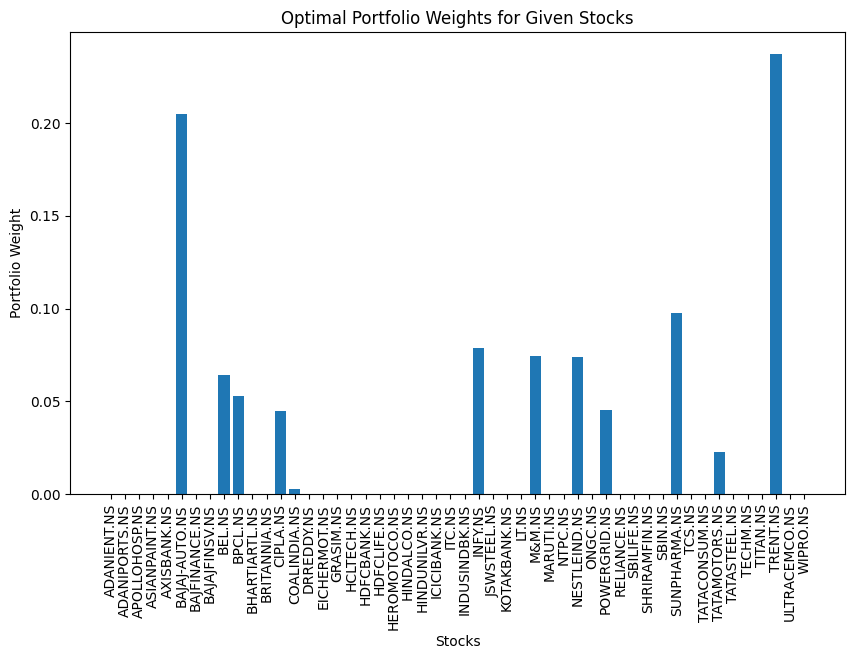

In [ ]:
def plot_optimal_weights(weights, tickers):
    plt.figure(figsize=(10, 6))
    plt.bar(tickers, weights)
    plt.xlabel('Stocks')
    plt.ylabel('Portfolio Weight')
    plt.title('Optimal Portfolio Weights for Given Stocks')
    plt.xticks(rotation=90)
    plt.show()

plot_optimal_weights(optimized_weights, nifty50_stocks)

# **Monte Carlo Simulation**

In [ ]:
# Step 10: Monte Carlo Simulation for efficient frontier
num_portfolios = 10000
weights_record = []
portfolio_results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):

  # Generate random weights and normalize them to sum to 1
  weights = np.random.random(len(mean_returns_N50))
  weights /= np.sum(weights)        # Ensure weights sum to 1
  weights_record.append(weights)

  # Calculate the portfolio return, portfolio volatility and Sharpe ratio
  portfolio_return, portfolio_volatility, portfolio_sharpe = portfolio_performance(weights)

  portfolio_results[0, i] = portfolio_return
  portfolio_results[1, i] = portfolio_volatility
  portfolio_results[2, i] = portfolio_sharpe

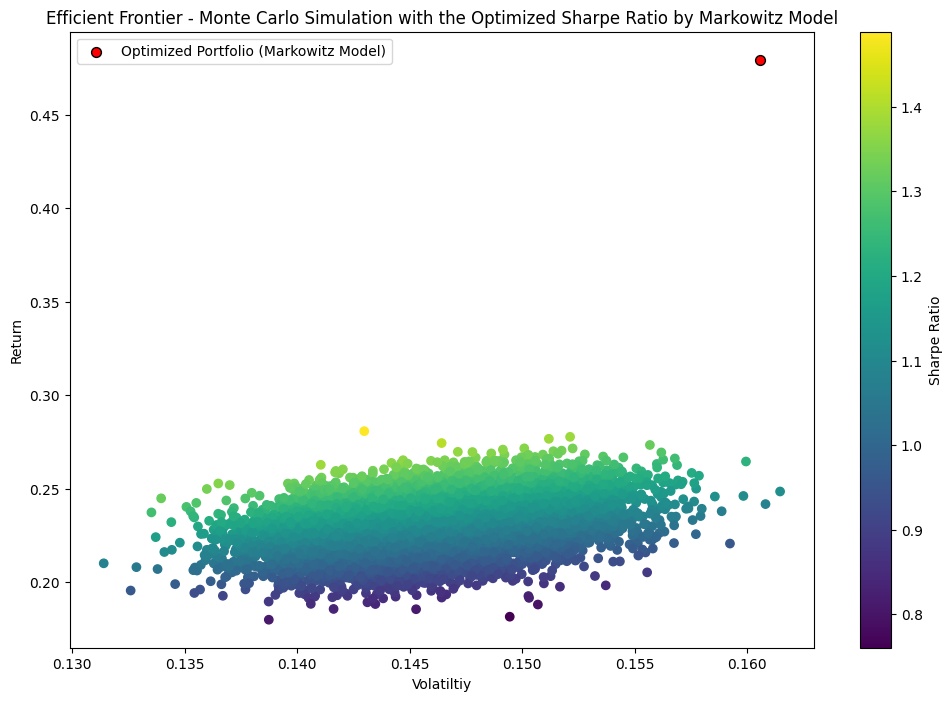

In [ ]:
# Step 11: Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_results[1, :], portfolio_results[0, :], c = portfolio_results[2, :], cmap = 'viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimized_stddev, optimized_return, color='red', s=50, edgecolors='black', label='Optimized Portfolio (Markowitz Model)')
plt.title('Efficient Frontier - Monte Carlo Simulation with the Optimized Sharpe Ratio by Markowitz Model')
plt.xlabel('Volatiltiy')
plt.ylabel('Return')
plt.legend()
plt.show()

In [ ]:
# Find the portfolio with the maximum Sharpe Ratio
max_sharpe_idx = np.argmax(portfolio_results[2])
max_sharpe_portfolio = portfolio_results[:, max_sharpe_idx]
max_sharpe_weights = weights_record[max_sharpe_idx]

# Find the portfolio with the minimum Volatility (Risk)
min_volatility_idx = np.argmin(portfolio_results[1])
min_volatility_portfolio = portfolio_results[:, min_volatility_idx]
min_volatility_weights = weights_record[min_volatility_idx]

# Print the optimal portfolio results
print("Portfolio with Maximum Sharpe Ratio:")
print(f"Return: {max_sharpe_portfolio[0]:.2f}, Volatility: {max_sharpe_portfolio[1]:.2f}, Sharpe Ratio: {max_sharpe_portfolio[2]:.2f}")
print(f"Optimal Weights: {max_sharpe_weights}")

print("\nPortfolio with Minimum Volatility (Risk):")
print(f"Return: {min_volatility_portfolio[0]:.2f}, Volatility: {min_volatility_portfolio[1]:.2f}, Sharpe Ratio: {min_volatility_portfolio[2]:.2f}")
print(f"Optimal Weights: {min_volatility_weights}")

Portfolio with Maximum Sharpe Ratio:
Return: 0.28, Volatility: 0.14, Sharpe Ratio: 1.49
Optimal Weights: [0.03957569 0.01915219 0.02386162 0.00603159 0.00010591 0.01832246
 0.00124979 0.00467094 0.03956537 0.03680137 0.00960374 0.03517902
 0.03861938 0.02032001 0.03616567 0.00113243 0.01275677 0.03771763
 0.00428626 0.00136822 0.00593312 0.00475643 0.0134076  0.01647413
 0.00462398 0.01127798 0.04677232 0.00756022 0.01921496 0.00923524
 0.02092022 0.00215756 0.03562037 0.03271307 0.04736092 0.01752835
 0.00191239 0.00970943 0.03375574 0.01036932 0.03915988 0.00134194
 0.02942082 0.0343747  0.03883272 0.02423168 0.03177445 0.03070219
 0.02801474 0.00435744]

Portfolio with Minimum Volatility (Risk):
Return: 0.21, Volatility: 0.13, Sharpe Ratio: 1.08
Optimal Weights: [0.00822836 0.00313276 0.03578471 0.02307493 0.00222017 0.03047484
 0.01630189 0.0112997  0.02400575 0.03565615 0.03474328 0.03604858
 0.0200275  0.00406887 0.02744119 0.02693316 0.02680749 0.03893671
 0.02017891 0.0062234  

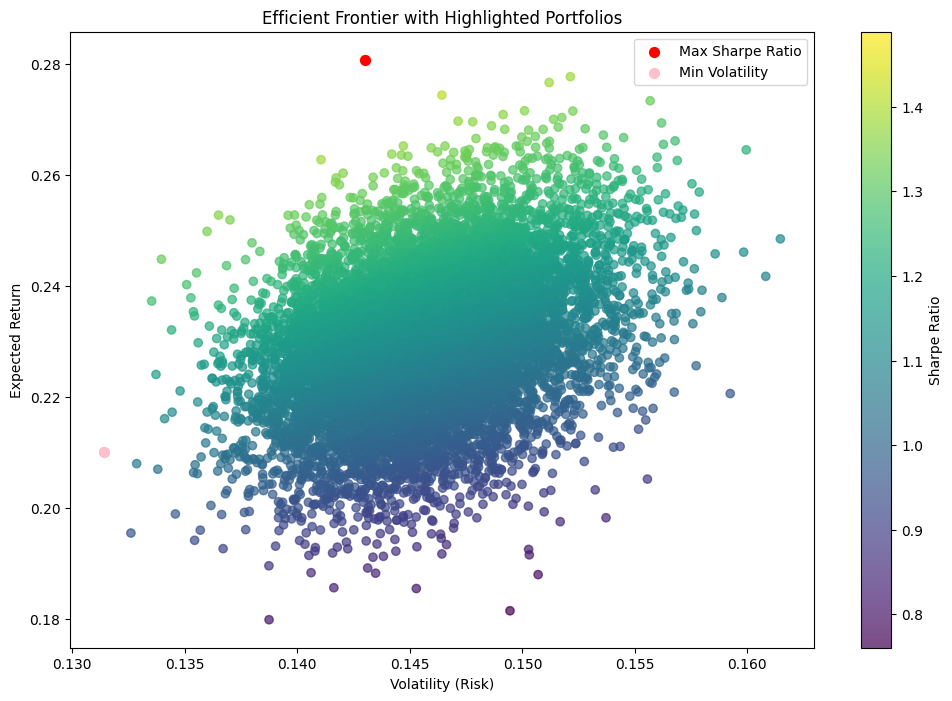

In [ ]:
# Plot Efficient Frontier with optimal portfolios highlighted
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_results[1, :], portfolio_results[0], c=portfolio_results[2], cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')

# Highlight Maximum Sharpe Ratio Portfolio
plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], color='r', s=50, label='Max Sharpe Ratio')

# Highlight Minimum Volatility Portfolio
plt.scatter(min_volatility_portfolio[1], min_volatility_portfolio[0], color='pink', s=50, label='Min Volatility')

plt.title('Efficient Frontier with Highlighted Portfolios')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.legend()
plt.show()

# **Risk Analysis**

In [ ]:
# Using the optimal portfolio weights with maximum Sharpe ratio
optimal_volatility = max_sharpe_portfolio[1]
optimal_returns = max_sharpe_portfolio[0]

print(f"Optimal Portfolio Volatility (Annualized): {optimal_volatility:.4f}")
print(f"Optimal Portfolio Return (Annualized): {optimal_returns:.4f}")

Optimal Portfolio Volatility (Annualized): 0.1430
Optimal Portfolio Return (Annualized): 0.2808


In [ ]:
from scipy.stats import norm

daily_volatility = optimal_volatility / np.sqrt(252)  # Convert annualized volatility to daily
daily_return = optimal_returns / 252  # Convert annualized return to daily

# Set confidence level
confidence_level = 0.95
z_score = norm.ppf(confidence_level)

# Calculate VaR at 95% confidence level
VaR = daily_return + z_score * daily_volatility

print(f"Value at Risk (VaR) at 95% confidence level: {VaR}")

Value at Risk (VaR) at 95% confidence level: 0.01592955510467782


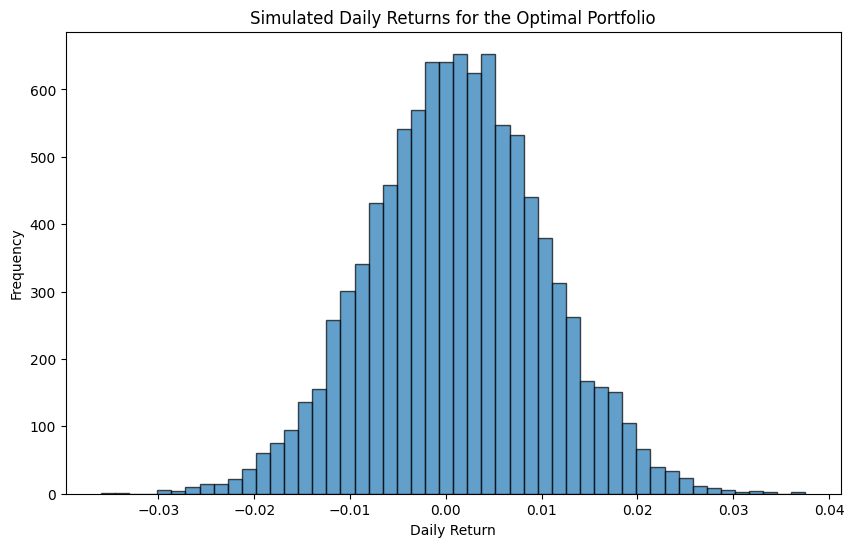

In [ ]:
# Simulate 10,000 daily returns based on the optimal portfolio's statistics
num_simulations = 10000
simulated_returns = np.random.normal(daily_return, daily_volatility, num_simulations)

# Plotting the simulated returns
plt.figure(figsize=(10, 6))
plt.hist(simulated_returns, bins=50, edgecolor='black', alpha=0.7)
plt.title("Simulated Daily Returns for the Optimal Portfolio")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Calculate VaR at 95% confidence level
VaR_95_sim = np.percentile(simulated_returns, (confidence_level) * 100)

print("Simulated VaR at 95% confidence level:", VaR_95_sim)

Simulated VaR at 95% confidence level: 0.016443324891963533


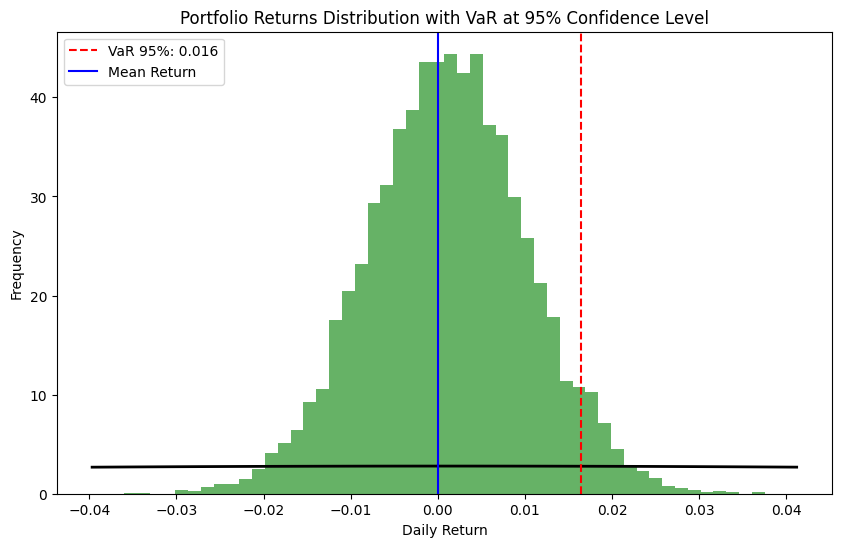

In [ ]:
# Plotting the histogram of simulated returns
plt.figure(figsize=(10, 6))
plt.hist(simulated_returns, bins=50, alpha=0.6, color='g', density=True)

# Overlay normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, daily_return, optimal_volatility)
plt.plot(x, p, 'k', linewidth=2)

# Highlight the VaR (5th percentile) on the plot
plt.axvline(x=VaR_95_sim, color='r', linestyle='--', label=f'VaR 95%: {VaR_95_sim:.3f}')
plt.axvline(x=0, color='b', linestyle='-', label='Mean Return')

# Add labels and legend
plt.title('Portfolio Returns Distribution with VaR at 95% Confidence Level')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.show()

#**For our 5 Stocks**

In [ ]:
tickers = ['TRITURBINE.NS', 'SBIN.NS', 'DEEPAKNTR.NS', 'BHARATFORG.NS', 'TATAELXSI.NS']
data = yf.download(tickers, start='2019-10-11', end='2024-10-11')['Adj Close']

# Step 2: Create a database of closing prices
stock_data = data

# Step 3: Calculate daily returns
selected_returns = stock_data.pct_change().dropna()
selected_returns

[*********************100%***********************]  5 of 5 completed


Ticker,BHARATFORG.NS,DEEPAKNTR.NS,SBIN.NS,TATAELXSI.NS,TRITURBINE.NS
Date,,,,,
2019-10-14 00:00:00+00:00,0.029176,-0.001804,0.003536,0.022300,-0.019136
2019-10-15 00:00:00+00:00,-0.004531,-0.014955,0.011744,0.007039,0.043522
2019-10-16 00:00:00+00:00,0.021009,0.008675,-0.009286,0.032184,-0.053212
2019-10-17 00:00:00+00:00,0.034865,0.041846,0.036712,0.053877,-0.016202
2019-10-18 00:00:00+00:00,-0.015133,0.009208,0.015822,0.000282,0.027792
...,...,...,...,...,...
2024-10-04 00:00:00+00:00,-0.010374,-0.020874,0.003211,-0.001818,-0.021712
2024-10-07 00:00:00+00:00,-0.027039,-0.023281,-0.032637,-0.019199,-0.018917
2024-10-08 00:00:00+00:00,0.033056,0.010135,0.014014,0.016075,0.110150


In [ ]:
# Calculate the Mean Returns and Covariance Matrix
mean_returns_N5 = selected_returns.mean()
covariance_matrix_N5 = selected_returns.cov()

In [ ]:
print("The mean daily returns:\n")
mean_returns_N5

The mean daily returns:



,0
Ticker,
BHARATFORG.NS,0.001358
DEEPAKNTR.NS,0.002124
SBIN.NS,0.001197
TATAELXSI.NS,0.002373
TRITURBINE.NS,0.002099


In [ ]:
print("The Covariance Matrix for the daily returns:\n")
covariance_matrix_N5

The Covariance Matrix for the daily returns:



Ticker,BHARATFORG.NS,DEEPAKNTR.NS,SBIN.NS,TATAELXSI.NS,TRITURBINE.NS
Ticker,,,,,
BHARATFORG.NS,0.000591,0.000217,0.000216,0.000160,0.000181
DEEPAKNTR.NS,0.000217,0.000646,0.000169,0.000186,0.000172
SBIN.NS,0.000216,0.000169,0.000447,0.000132,0.000153
TATAELXSI.NS,0.000160,0.000186,0.000132,0.000619,0.000119
TRITURBINE.NS,0.000181,0.000172,0.000153,0.000119,0.000960


In [ ]:
# Define the function to calculate portfolio performance
def performance_N5(weights_N5, mean_returns_N5 = mean_returns_N5, cov_matrix_N5 = covariance_matrix_N5, risk_free_rate = latest_risk_free_rate):
    N5_returns = np.sum(mean_returns_N5 * weights_N5) * 252
    N5_stddev = np.sqrt(np.dot(weights_N5.T, np.dot(cov_matrix_N5, weights_N5))) * np.sqrt(252)
    N5_sharpe = (N5_returns - risk_free_rate) / N5_stddev
    return N5_returns, N5_stddev, N5_sharpe

# Constraints and Bounds
constraints_N5 = ({'type': 'eq', 'fun': lambda weights_N5: np.sum(weights_N5) - 1})
bounds_N5 = tuple((0, 1) for _ in range(len(mean_returns_N5)))

# Function to minimize inverse sharpe ratio
def N5_minimize_inverse_sharpe_ratio(weights_N5):
    return 1 / performance_N5(weights_N5)[2]

# Initial Guess for weights
initial_weights_N5 = len(tickers) * [1. / len(tickers)]

# Optimize the portfolio to maximize the Sharpe Ratio
optimized_result_N5 = minimize(N5_minimize_inverse_sharpe_ratio, initial_weights_N5, method='SLSQP', bounds=bounds_N5, constraints=constraints_N5)

# The resulting optimized weights after the optimization process
optimized_weights_N5 = optimized_result_N5.x
optimized_weights_N5

array([0.00898085, 0.29760256, 0.03613766, 0.44498351, 0.21229541])

In [ ]:
optimized_return_N5, optimized_stddev_N5, optimized_sharpe_N5 = performance_N5(optimized_weights_N5)

print("Optimized Return:", optimized_return_N5)
print("Optimized Standard Deviation:", optimized_stddev_N5)
print("Optimized Sharpe Ratio:", optimized_sharpe_N5)

Optimized Return: 0.5516429415741658
Optimized Standard Deviation: 0.2885921112796737
Optimized Sharpe Ratio: 1.676286089141753


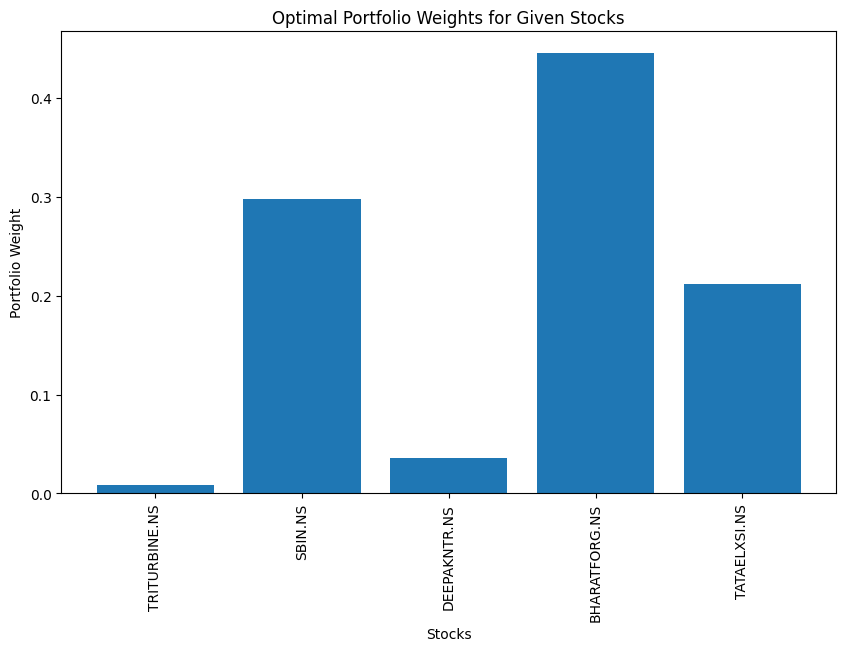

In [ ]:
plot_optimal_weights(optimized_weights_N5, tickers)

In [ ]:
# Step 10: Monte Carlo Simulation for efficient frontier

num_portfolios = 10000
weights_record_N5 = []
portfolio_results_N5 = np.zeros((3, num_portfolios))

for i in range(num_portfolios):

  # Generate random weights and normalize them to sum to 1
  weights_N5 = np.random.random(len(mean_returns_N5))
  weights_N5 /= np.sum(weights_N5)        # Ensure weights sum to 1
  weights_record_N5.append(weights_N5)

  # Calculate the portfolio return, portfolio volatility and Sharpe ratio
  portfolio_return_N5, portfolio_volatility_N5, portfolio_sharpe_N5 = performance_N5(weights_N5)

  portfolio_results_N5[0, i] = portfolio_return_N5
  portfolio_results_N5[1, i] = portfolio_volatility_N5
  portfolio_results_N5[2, i] = portfolio_sharpe_N5

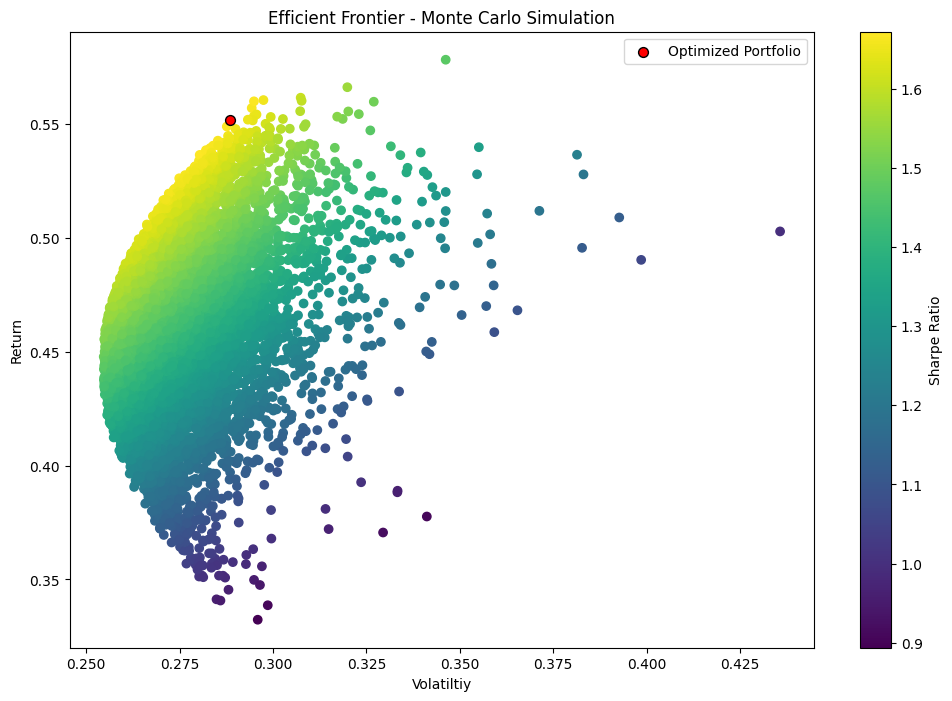

In [ ]:
# Step 11: Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_results_N5[1, :], portfolio_results_N5[0, :], c = portfolio_results_N5[2, :], cmap = 'viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimized_stddev_N5, optimized_return_N5, color='red', s=50, edgecolors='black', label='Optimized Portfolio')
plt.title('Efficient Frontier - Monte Carlo Simulation')
plt.xlabel('Volatiltiy')
plt.ylabel('Return')
plt.legend()
plt.show()

In [ ]:
# Find the portfolio with the maximum Sharpe Ratio
max_sharpe_idx_N5 = np.argmax(portfolio_results_N5[2])
max_sharpe_portfolio_N5 = portfolio_results_N5[:, max_sharpe_idx_N5]
max_sharpe_weights_N5 = weights_record_N5[max_sharpe_idx_N5]

# Find the portfolio with the minimum Volatility (Risk)
min_volatility_idx_N5 = np.argmin(portfolio_results_N5[1])
min_volatility_portfolio_N5 = portfolio_results_N5[:, min_volatility_idx_N5]
min_volatility_weights_N5 = weights_record_N5[min_volatility_idx_N5]

# Print the optimal portfolio results
print("Portfolio with Maximum Sharpe Ratio:")
print(f"Return: {max_sharpe_portfolio_N5[0]:.2f}, Volatility: {max_sharpe_portfolio_N5[1]:.2f}, Sharpe Ratio: {max_sharpe_portfolio_N5[2]:.2f}")
print(f"Optimal Weights: {max_sharpe_weights_N5}")

print("\nPortfolio with Minimum Volatility (Risk):")
print(f"Return: {min_volatility_portfolio_N5[0]:.2f}, Volatility: {min_volatility_portfolio_N5[1]:.2f}, Sharpe Ratio: {min_volatility_portfolio_N5[2]:.2f}")
print(f"Optimal Weights: {min_volatility_weights_N5}")

Portfolio with Maximum Sharpe Ratio:
Return: 0.55, Volatility: 0.29, Sharpe Ratio: 1.67
Optimal Weights: [0.00359377 0.24679053 0.05820626 0.46813406 0.22327538]

Portfolio with Minimum Volatility (Risk):
Return: 0.45, Volatility: 0.25, Sharpe Ratio: 1.49
Optimal Weights: [0.16348131 0.15358627 0.30831583 0.26830032 0.10631627]


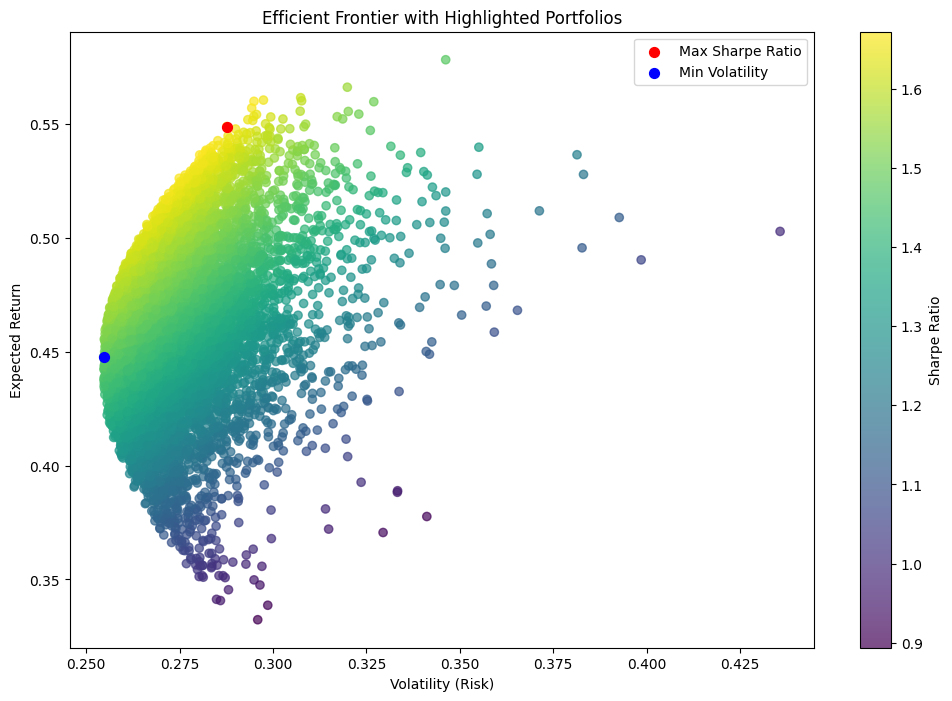

In [ ]:
# Plot Efficient Frontier with optimal portfolios highlighted
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_results_N5[1, :], portfolio_results_N5[0], c=portfolio_results_N5[2], cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')

# Highlight Maximum Sharpe Ratio Portfolio
plt.scatter(max_sharpe_portfolio_N5[1], max_sharpe_portfolio_N5[0], color='r', s=50, label='Max Sharpe Ratio')

# Highlight Minimum Volatility Portfolio
plt.scatter(min_volatility_portfolio_N5[1], min_volatility_portfolio_N5[0], color='b', s=50, label='Min Volatility')

plt.title('Efficient Frontier with Highlighted Portfolios')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.legend()
plt.show()

In [ ]:
# Using the optimal portfolio weights with maximum Sharpe ratio
optimal_volatility_N5 = max_sharpe_portfolio_N5[1]
optimal_returns_N5 = max_sharpe_portfolio_N5[0]

print(f"Optimal Portfolio Volatility (Annualized): {optimal_volatility_N5:.4f}")
print(f"Optimal Portfolio Return (Annualized): {optimal_returns_N5:.4f}")

Optimal Portfolio Volatility (Annualized): 0.2876
Optimal Portfolio Return (Annualized): 0.5489


In [ ]:
from scipy.stats import norm

daily_volatility_N5 = optimal_volatility_N5 / np.sqrt(252)  # Convert annualized volatility to daily
daily_return_N5 = optimal_returns_N5 / 252  # Convert annualized return to daily

# Set confidence level
confidence_level = 0.95
z_score = norm.ppf(confidence_level)

# Calculate VaR at 95% confidence level
VaR = daily_return_N5 + z_score * daily_volatility_N5

print(f"Value at Risk (VaR) at 95% confidence level: {VaR}")

Value at Risk (VaR) at 95% confidence level: 0.03198298198436844


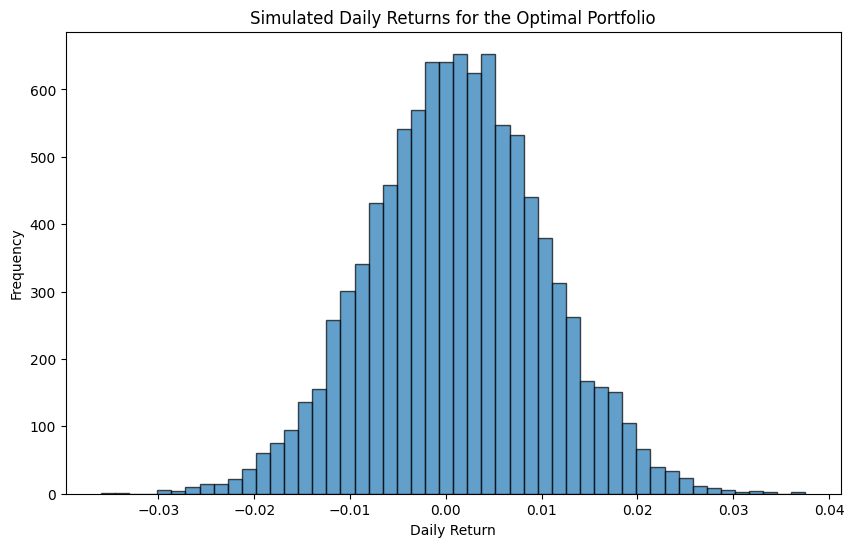

In [ ]:
# Simulate 10,000 daily returns based on the optimal portfolio's statistics
num_simulations = 10000
simulated_returns_N5 = np.random.normal(daily_return_N5, daily_volatility_N5, num_simulations)

# Plotting the simulated returns
plt.figure(figsize=(10, 6))
plt.hist(simulated_returns, bins=50, edgecolor='black', alpha=0.7)
plt.title("Simulated Daily Returns for the Optimal Portfolio")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Calculate VaR at 95% confidence level
VaR_95_sim_N5 = np.percentile(simulated_returns_N5, (confidence_level) * 100)

print("Simulated VaR at 95% confidence level:", VaR_95_sim_N5)

Simulated VaR at 95% confidence level: 0.03276730629186926


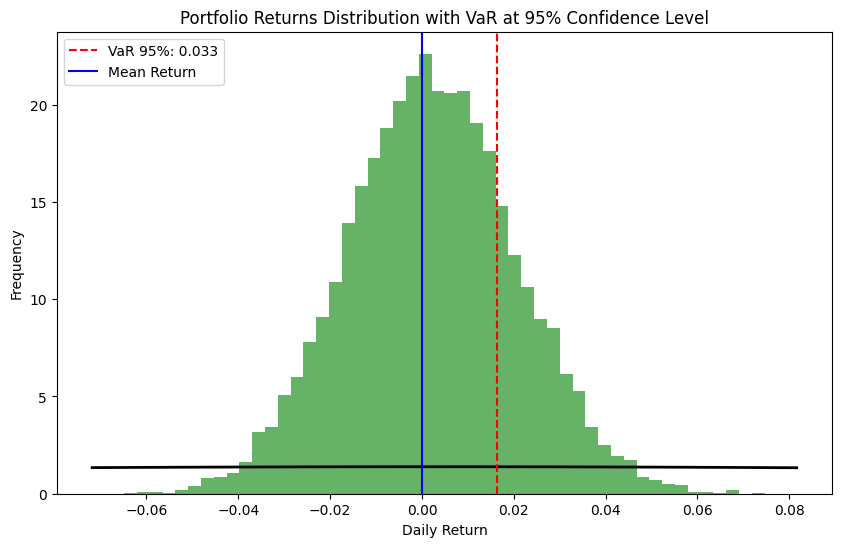

In [ ]:
# Plotting the histogram of simulated returns
plt.figure(figsize=(10, 6))
plt.hist(simulated_returns_N5, bins=50, alpha=0.6, color='g', density=True)

# Overlay normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, daily_return_N5, optimal_volatility_N5)
plt.plot(x, p, 'k', linewidth=2)

# Highlight the VaR (5th percentile) on the plot
plt.axvline(x=VaR_95_sim, color='r', linestyle='--', label=f'VaR 95%: {VaR_95_sim_N5:.3f}')
plt.axvline(x=0, color='b', linestyle='-', label='Mean Return')

# Add labels and legend
plt.title('Portfolio Returns Distribution with VaR at 95% Confidence Level')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.show()